# 데이터 조합과 Group 연산

In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [ ]:
pd.options.display.notebook_repr_html = False

In [2]:
%matplotlib inline

## GroupBy

In [31]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,2.455095,-0.289889,a,one
1,1.557408,-0.590688,a,two
2,-0.780897,-1.877893,b,one
3,-0.923289,-0.522037,b,two
4,-0.046537,-0.870842,a,one


In [32]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [33]:
grouped.mean()

key1
a    1.321989
b   -0.852093
Name: data1, dtype: float64

#### 연습문제

10명의 학생이 세 과목 점수를 갖는다.

a. 점수 구간별로 학생을 분류하고, 각 구간의 평균을 구하시오.

b. 남자와 여자 학생들의 점수 평균을 구하시오.

In [26]:
scores = DataFrame(np.random.randint(0,100, size=(10,3)),
                    columns=range(100,103))
# 성별 정보 설정
gender = []
for i in np.random.randint(0,2, size=10):
    if i:
        gender.append(True)
    else:
        gender.append(False)
scores[u'여자']=gender
scores

,100,101,102,여자
0,30,83,89,False
1,14,80,80,False
2,67,96,96,True
3,16,17,4,False
4,14,33,54,True
5,85,33,5,True
6,83,57,39,True
7,5,61,88,True
8,34,39,83,False
9,51,37,53,True


In [29]:
pd.cut(scores, range(0, 110, 10)).value_counts()

(0, 10]      9
(10, 20]     4
(20, 30]     1
(30, 40]     6
(40, 50]     0
(50, 60]     4
(60, 70]     2
(70, 80]     2
(80, 90]     6
(90, 100]    2
dtype: int64

In [27]:
scores.groupby(u'여자').mean()

,100,101,102
여자,,,
False,23.500000,54.750000,64.000000
True,50.833333,52.833333,55.833333


In [34]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     1.204279
      two     1.557408
b     one    -0.780897
      two    -0.923289
Name: data1, dtype: float64

In [35]:
means.unstack()

key2,one,two
key1,,
a,1.204279,1.557408
b,-0.780897,-0.923289


In [36]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005    1.557408
            2006   -0.780897
Ohio        2005    0.765903
            2006   -0.046537
Name: data1, dtype: float64

In [37]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,1.321989,-0.583807
b,-0.852093,-1.199965


In [38]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one   1.204279 -0.580366
     two   1.557408 -0.590688
b    one  -0.780897 -1.877893
     two  -0.923289 -0.522037

In [39]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

### 그룹의 개별 항목 반복

In [42]:
df.groupby('key1')

In [43]:
list(df.groupby('key1'))

[('a',       data1     data2 key1 key2
  0  2.455095 -0.289889    a  one
  1  1.557408 -0.590688    a  two
  4 -0.046537 -0.870842    a  one), ('b',       data1     data2 key1 key2
  2 -0.780897 -1.877893    b  one
  3 -0.923289 -0.522037    b  two)]

In [44]:
dict(df.groupby('key1'))

TypeError: attribute of type 'str' is not callable

In [40]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
      data1     data2 key1 key2
0  2.455095 -0.289889    a  one
1  1.557408 -0.590688    a  two
4 -0.046537 -0.870842    a  one
b
      data1     data2 key1 key2
2 -0.780897 -1.877893    b  one
3 -0.923289 -0.522037    b  two


In [49]:
from __future__ import print_function # 3버전 print 함수 사용

# for name, group in df.groupby(['key1', 'key2']):
for (k1, k2), group in df.groupby(['key1', 'key2']):
#     print(name)
    print(k1, k2)
    print(group)

a one
      data1     data2 key1 key2
0  2.455095 -0.289889    a  one
4 -0.046537 -0.870842    a  one
a two
      data1     data2 key1 key2
1  1.557408 -0.590688    a  two
b one
      data1     data2 key1 key2
2 -0.780897 -1.877893    b  one
b two
      data1     data2 key1 key2
3 -0.923289 -0.522037    b  two


In [50]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

,data1,data2,key1,key2
2,-0.780897,-1.877893,b,one
3,-0.923289,-0.522037,b,two


In [ ]:
df.dtypes

In [ ]:
grouped = df.groupby(df.dtypes, axis=1)
dict(list(grouped))

### 열 선택

In [56]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.580366
     two  -0.590688
b    one  -1.877893
     two  -0.522037

In [57]:
df.groupby(['key1', 'key2'])['data2'].mean()

key1  key2
a     one    -0.580366
      two    -0.590688
b     one    -1.877893
      two    -0.522037
Name: data2, dtype: float64

### 사전과 Series에서 분류

In [59]:
people = DataFrame(np.random.randn(5, 5),
                   columns=['a', 'b', 'c', 'd', 'e'],
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.ix[2:3, ['b', 'c']] = np.nan
people

,a,b,c,d,e
Joe,2.602352,-0.263671,-0.578371,-0.553437,0.121153
Steve,-0.917439,-0.325788,0.897779,-1.005297,0.975437
Wes,0.539778,NaN,NaN,-2.805646,0.162064
Jim,-0.031984,-0.947469,1.518477,-1.735067,-1.527835
Travis,-0.320644,-1.271528,0.630260,-0.814195,-0.103733


In [ ]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [ ]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

In [ ]:
map_series = Series(mapping)
map_series

In [ ]:
people.groupby(map_series, axis=1).count()

### Grouping with functions

In [ ]:
people.groupby(len).sum()

In [ ]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

### Grouping by index levels

In [ ]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]], names=['cty', 'tenor'])
hier_df = DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

In [ ]:
hier_df.groupby(level='cty', axis=1).count()

## Data aggregation

In [ ]:
df

In [ ]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

In [ ]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

In [ ]:
grouped.describe()

In [ ]:
tips = pd.read_csv('ch08/tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

### Column-wise and multiple function application

In [ ]:
grouped = tips.groupby(['sex', 'smoker'])

In [ ]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

In [ ]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

In [ ]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

In [ ]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

In [ ]:
result['tip_pct']

In [ ]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

In [ ]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

In [ ]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

### Returning aggregated data in "unindexed" form

In [ ]:
tips.groupby(['sex', 'smoker'], as_index=False).mean()

## Group-wise operations and transformations

In [ ]:
df

In [ ]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means

In [ ]:
pd.merge(df, k1_means, left_on='key1', right_index=True)

In [ ]:
key = ['one', 'two', 'one', 'two', 'one']
people.groupby(key).mean()

In [ ]:
people.groupby(key).transform(np.mean)

In [ ]:
def demean(arr):
    return arr - arr.mean()
demeaned = people.groupby(key).transform(demean)
demeaned

In [ ]:
demeaned.groupby(key).mean()

### Apply: General split-apply-combine

In [ ]:
def top(df, n=5, column='tip_pct'):
    return df.sort_index(by=column)[-n:]
top(tips, n=6)

In [ ]:
tips.groupby('smoker').apply(top)

In [ ]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

In [ ]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

In [ ]:
result.unstack('smoker')

#### Suppressing the group keys

In [ ]:
tips.groupby('smoker', group_keys=False).apply(top)

### Quantile and bucket analysis

In [ ]:
frame = DataFrame({'data1': np.random.randn(1000),
                   'data2': np.random.randn(1000)})
factor = pd.cut(frame.data1, 4)
factor[:10]

In [ ]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

grouped = frame.data2.groupby(factor)
grouped.apply(get_stats).unstack()

#ADAPT the output is not sorted in the book while this is the case now (swap first two lines)

In [ ]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)

grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

###  예제: 그룹 내 값으로 누락된 값 채우기

In [60]:
s = Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1   -1.032627
2         NaN
3    1.358752
4         NaN
5    0.508276
dtype: float64

In [61]:
s.fillna(s.mean())

0    0.278134
1   -1.032627
2    0.278134
3    1.358752
4    0.278134
5    0.508276
dtype: float64

In [3]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = Series(np.random.randn(8), index=states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio         -0.204708
New York      0.478943
Vermont            NaN
Florida      -0.555730
Oregon        1.965781
Nevada             NaN
California    0.092908
Idaho              NaN
dtype: float64

In [4]:
group_key

['East', 'East', 'East', 'East', 'West', 'West', 'West', 'West']

In [63]:
data.groupby(group_key).mean()

East    0.178411
West    0.509050
dtype: float64

In [64]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio         -0.557217
New York     -0.006565
Vermont       0.178411
Florida       1.099015
Oregon        0.901692
Nevada        0.509050
California    0.116408
Idaho         0.509050
dtype: float64

In [65]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])

data.groupby(group_key).apply(fill_func)

Ohio         -0.557217
New York     -0.006565
Vermont       0.500000
Florida       1.099015
Oregon        0.901692
Nevada       -1.000000
California    0.116408
Idaho        -1.000000
dtype: float64

### 예제: 랜더 표본과 순열

In [5]:
# 포커카드 52장 생성
suits = ['H', 'S', 'C', 'D']
card_val = (range(1, 11) + [10] * 3) * 4
base_names = ['A'] + range(2, 11) + ['J', 'K', 'Q']

In [12]:
card_val[:13]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]

In [6]:
base_names

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'K', 'Q']

In [13]:
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = Series(card_val, index=cards)
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [16]:
# 무작위로 카드 추출
def draw(deck, n=5):
    return deck.take(np.random.permutation(len(deck))[:n])
draw(deck)

4S    4
3S    3
5H    5
3C    3
2D    2
dtype: int64

In [69]:
get_suit = lambda card: card[-1] # 카드 문양 추출
# 각 무늬별 카드 2장 무작위로 추출
deck.groupby(get_suit).apply(draw, n=2)

C  10C    10
   QC     10
D  7D      7
   2D      2
H  2H      2
   7H      7
S  KS     10
   QS     10
dtype: int64

In [ ]:
# 같은 작업, 다른 스타일
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

### 예제: 그룹 가중 평균과 상관관계

In [17]:
df = DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                'data': np.random.randn(8),
                'weights': np.random.rand(8)})
df

,category,data,weights
0,a,-0.024116,0.353566
1,a,1.462648,0.650852
2,a,-1.651593,0.312933
3,a,0.221755,0.768735
4,b,-0.838210,0.781837
5,b,1.396553,0.852409
6,b,-1.553775,0.949906
7,b,-0.007680,0.107323


In [18]:
np.average? # 가중평균

In [19]:
grouped = df.groupby('category')
# 각 그룹에서 'data'열을 추출해 np.average의 weights를 
# 해당 그룹의 'weights' 값으로 선택해 연산 수행
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a    0.286217
b   -0.349872
dtype: float64

S&P 500 지수 종가 데이터 분석

In [27]:
close_px = pd.read_csv('pydata/ch09/stock_px.csv',
                      index_col=0, parse_dates=True)
close_px

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


In [21]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [28]:
rets = close_px.pct_change().dropna()
rets[:3]

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545


groupby의 그룹 기준을 함수로 하는 경우

In [29]:
# 연도별로 데이터 분류
by_year = rets.groupby(lambda idx: idx.year)

In [31]:
# 연도별 분류에 분석 함수 적용
spx_corr = lambda g: g.corrwith(g['SPX'])
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1
2004,0.374283,0.588531,0.557742,1
2005,0.467540,0.562374,0.631010,1
2006,0.428267,0.406126,0.518514,1
2007,0.508118,0.658770,0.786264,1
2008,0.681434,0.804626,0.828303,1
2009,0.707103,0.654902,0.797921,1
2010,0.710105,0.730118,0.839057,1
2011,0.691931,0.800996,0.859975,1


In [23]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### 예제: 그룹 간 선형회기

In [ ]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [ ]:
by_year.apply(regress, 'AAPL', ['SPX'])

### 피벗테이블

In [32]:
tips = pd.read_csv('pydata/ch08/tips.csv') # p.363
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [33]:
tips.pivot_table(index=['sex', 'smoker'])

size       tip  total_bill
sex    smoker                                
Female No      2.592593  2.773519   18.105185
       Yes     2.242424  2.931515   17.977879
Male   No      2.711340  3.113402   19.791237
       Yes     2.500000  3.051167   22.284500

pivot_table은 groupby를 편리하게 수행해 주는 인터페이스일 뿐

In [34]:
tips.groupby(['sex', 'smoker']).mean()

total_bill       tip      size
sex    smoker                                
Female No       18.105185  2.773519  2.592593
       Yes      17.977879  2.931515  2.242424
Male   No       19.791237  3.113402  2.711340
       Yes      22.284500  3.051167  2.500000

팁의 비율을 계산해 새로운 열 tip_pct 추가하기

In [37]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:3]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587


In [40]:
tips.groupby(['sex', 'day'])['tip_pct', 'size'].mean()

tip_pct      size
sex    day                     
Female Fri   0.199388  2.111111
       Sat   0.156470  2.250000
       Sun   0.181569  2.944444
       Thur  0.157525  2.468750
Male   Fri   0.143385  2.100000
       Sat   0.151577  2.644068
       Sun   0.162344  2.810345
       Thur  0.165276  2.433333

In [38]:
tips.pivot_table(['tip_pct', 'size'], 
                 index=['sex', 'day'],
                 columns='smoker')

tip_pct                size          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   0.165296  0.209129  2.500000  2.000000
       Sat   0.147993  0.163817  2.307692  2.200000
       Sun   0.165710  0.237075  3.071429  2.500000
       Thur  0.155971  0.163073  2.480000  2.428571
Male   Fri   0.138005  0.144730  2.000000  2.125000
       Sat   0.162132  0.139067  2.656250  2.629630
       Sun   0.158291  0.173964  2.883721  2.600000
       Thur  0.165706  0.164417  2.500000  2.300000

In [43]:
tips.pivot_table(['tip_pct', 'size'], 
                 index=['sex', 'day'],
                 columns='smoker', 
                 margins=True)

tip_pct                          size                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   0.165296  0.209129  0.199388  2.500000  2.000000  2.111111
       Sat   0.147993  0.163817  0.156470  2.307692  2.200000  2.250000
       Sun   0.165710  0.237075  0.181569  3.071429  2.500000  2.944444
       Thur  0.155971  0.163073  0.157525  2.480000  2.428571  2.468750
Male   Fri   0.138005  0.144730  0.143385  2.000000  2.125000  2.100000
       Sat   0.162132  0.139067  0.151577  2.656250  2.629630  2.644068
       Sun   0.158291  0.173964  0.162344  2.883721  2.600000  2.810345
       Thur  0.165706  0.164417  0.165276  2.500000  2.300000  2.433333
All          0.159328  0.163196  0.160803  2.668874  2.408602  2.569672

In [42]:
tips.pivot_table('tip_pct', index=['sex', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

day            Fri  Sat  Sun  Thur  All
sex    smoker                          
Female No        2   13   14    25   54
       Yes       7   15    4     7   33
Male   No        2   32   43    20   97
       Yes       8   27   15    10   60
All             19   87   76    62  244

In [41]:
tips.pivot_table('size', 
                 index=['time', 'sex', 'smoker'],
                 columns='day', 
                 aggfunc='sum', 
                 fill_value=0)

day                   Fri  Sat  Sun  Thur
time   sex    smoker                     
Dinner Female No        2   30   43     2
              Yes       8   33   10     0
       Male   No        4   85  124     0
              Yes      12   71   39     0
Lunch  Female No        3    0    0    60
              Yes       6    0    0    17
       Male   No        0    0    0    50
              Yes       5    0    0    23

### 교차일람표

In [ ]:
from StringIO import StringIO
data = """\
Sample    Gender    Handedness
1    Female    Right-handed
2    Male    Left-handed
3    Female    Right-handed
4    Male    Right-handed
5    Male    Left-handed
6    Male    Right-handed
7    Female    Right-handed
8    Female    Left-handed
9    Male    Right-handed
10    Female    Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

In [ ]:
data

In [ ]:
pd.crosstab(data.Gender, data.Handedness, margins=True)

In [ ]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

## 예제: 미국 선거 데이터

In [86]:
fec = pd.read_csv('pydata/ch09/P00000001-ALL.csv')
fec[:3]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.686334e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073


In [47]:
fec.ix[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [48]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [49]:
unique_cands[2]

'Obama, Barack'

In [50]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [51]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [52]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

각 후보별 정당 정보를 새로운 열로 추가

In [87]:
fec['party'] = fec.cand_nm.map(parties)
fec[:5][['cand_nm','party']]

,cand_nm,party
0,"Bachmann, Michelle",Republican
1,"Bachmann, Michelle",Republican
2,"Bachmann, Michelle",Republican
3,"Bachmann, Michelle",Republican
4,"Bachmann, Michelle",Republican


후보자 정당별 합계

In [56]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
dtype: int64

데이터 다듬기

In [88]:
fec.contb_receipt_amt[:3]

0    250
1     50
2    250
Name: contb_receipt_amt, dtype: float64

In [89]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
dtype: int64

기부금이 양수인 데이터만 추출하기

In [90]:
fec = fec[fec.contb_receipt_amt > 0]
fec[:5]['contb_receipt_amt']

0    250
1     50
2    250
3    250
4    300
Name: contb_receipt_amt, dtype: float64

주요 후보만 선정

In [91]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]
fec_mrbo

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.402302e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,25,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.402302e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,110,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,9.128002e+07,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,9.128000e+07,CISCO,ENGINEER,30,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,9.012009e+07,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
416,C00431171,P80003353,"Romney, Mitt","WILSON, ANDREW C. MR.",DPO,AE,9.870002e+07,US DEPT OF STATE,FOREIGN SERVICE OFFICER,50,17-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
417,C00431171,P80003353,"Romney, Mitt","GRIFFIS, JOHN",APO,AE,9.128001e+07,US ARMY,MILITARY OFFICER,250,20-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
418,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,9.012009e+07,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100,09-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
419,C00431171,P80003353,"Romney, Mitt","GRIFFIS, JOHN",APO,AE,9.128001e+07,US ARMY,MILITARY OFFICER,250,28-JAN-12,NaN,NaN,NaN,SA17A,771933,Republican
420,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE MR.",APO,AE,9.128000e+07,US ARMY,ENGINEER,50,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican


### 기부 통계

In [65]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
dtype: int64

In [92]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFORTS)': 'NOT PROVIDED',
    'C.E.O.': 'CEO'
}

# 매핑된 값을 가져온다. 없으면 해당 값을 그대로 활용
fec.contbr_occupation = fec.contbr_occupation.map(
    lambda x: occ_mapping.get(x,x)) 

In [82]:
fec.contbr_occupation.value_counts()[:10]

NOT PROVIDED    56245
CEO              1594
dtype: int64

In [93]:
fec.contbr_employer[:10]

0                  RETIRED
1                  RETIRED
2    INFORMATION REQUESTED
3                     NONE
4                     NONE
5                     NONE
6    INFORMATION REQUESTED
7                     NONE
8      ST. JOSEPH HOSPITAL
9                 RAYTHEON
Name: contbr_employer, dtype: object

In [96]:
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'SELF': 'SELF-EMPLOYED',
    'SELF EMPLOYED': 'SELF-EMPLOYED'
}

fec.contbr_employer = fec.contbr_employer.map(
    lambda x: emp_mapping.get(x,x))
fec.contbr_employer[:10]

0                RETIRED
1                RETIRED
2           NOT PROVIDED
3                   NONE
4                   NONE
5                   NONE
6           NOT PROVIDED
7                   NONE
8    ST. JOSEPH HOSPITAL
9               RAYTHEON
Name: contbr_employer, dtype: object

In [105]:
by_occupation = fec.pivot_table('contb_receipt_amt', aggfunc=sum,
                               index='contbr_occupation',
                               columns='party')
by_occupation[:20]

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100,NaN
AREA VICE PRESIDENT,250,NaN
RESEARCH ASSOCIATE,100,NaN
TEACHER,500,NaN
THERAPIST,3900,NaN
'MIS MANAGER,NaN,177.60
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.00
(RETIRED),NaN,250.00
-,5000,2114.80


In [106]:
over_2mm = by_occupation[by_occupation.sum(axis=1) > 2000000]
over_2mm[:10]

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


In [104]:
%matplotlib inline

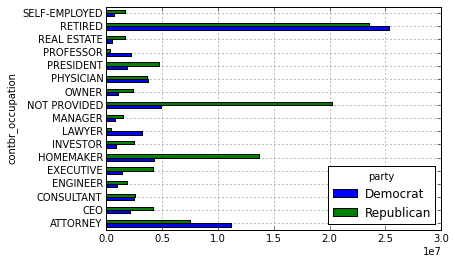

In [107]:
over_2mm.plot(kind='barh')

In [108]:
def get_top_amounts(group, key, n=5):
    # 각 후보별 기부금액 합계 산출
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    
    # 기부금액을 각 후부별 내림차순으로 정렬
    return totals.order(ascending=False)[:n]

In [110]:
grouped = fec_mrbo.groupby('cand_nm')
grouped

In [111]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [112]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

기부 금액을 특정한 규모에 따라 분류

In [116]:
bins = np.array([0, 1, 10, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels[:10]

411      (10, 100]
412    (100, 1000]
413    (100, 1000]
414      (10, 100]
415      (10, 100]
416      (10, 100]
417    (100, 1000]
418      (10, 100]
419    (100, 1000]
420      (10, 100]
Name: contb_receipt_amt, dtype: category
Categories (8, object): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [125]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,NaN
"(1000000, 10000000]",4,NaN


In [127]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


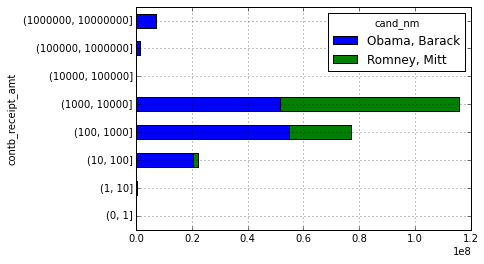

In [128]:
bucket_sums.plot(kind='barh', stacked=True)

각 그룹별 정규화 수행

In [130]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


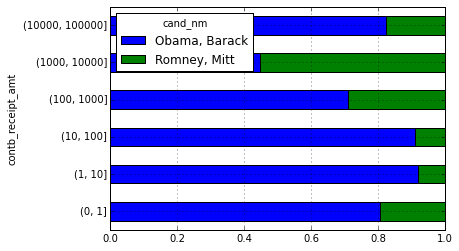

In [133]:
normed_sums[:-2].plot(kind='barh', stacked=True)

## 주별 기부 통계

In [134]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])

In [139]:
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals[:5]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,56405.00,135.00
AB,2048.00,0.00
AE,42973.75,5680.00
AK,281840.15,86204.24
AL,543123.48,527303.51


In [142]:
totals = totals[totals.sum(1) > 10**5]
totals[:5]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60


In [145]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
